In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

from data_prep.imputer import Imputer
from analysis.correlation import Correlation
from visualisation.plotting_helpers import grid_plots

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

Path to dataset files: /Users/rachaelmcalister/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1


# Load in DataFrame and examine data

In [53]:
df = pd.read_csv(f'{path}/Life Expectancy Data.csv')

In [54]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [55]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [57]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


# Impute Null Values

In [58]:
df.columns = [x.lstrip().rstrip().lower().replace(' ', '_').replace('-', '_').replace('/', '_') for x in df.columns]

In [59]:
df = df[~df.life_expectancy.isnull()]

In [60]:
df['developing'] = np.where(df['status'] == 'Developing', 1, 0)

In [114]:
categorical_columns = ['country', 'status']
numerical_columns = [
       'year', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'
    ]
binary_categorical_columns = ['developing']
target_column = 'life_expectancy'

In [62]:
imputer = Imputer(
    numerical_columns=numerical_columns,
    categorical_columns=categorical_columns
)

In [63]:
df = imputer.impute_median(df)

In [64]:
df = imputer.impute_mode(df)

# Create Train-Test Splits and Examine Correlation

In [65]:
X = df[categorical_columns+numerical_columns+binary_categorical_columns]
y = df[target_column]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
train_df = pd.concat([X_train, y_train], axis=1)

In [68]:
corr = Correlation(
    target_column=target_column,
    numerical_columns=numerical_columns,
    categorical_columns=categorical_columns,
    binary_categorical_columns=binary_categorical_columns
)

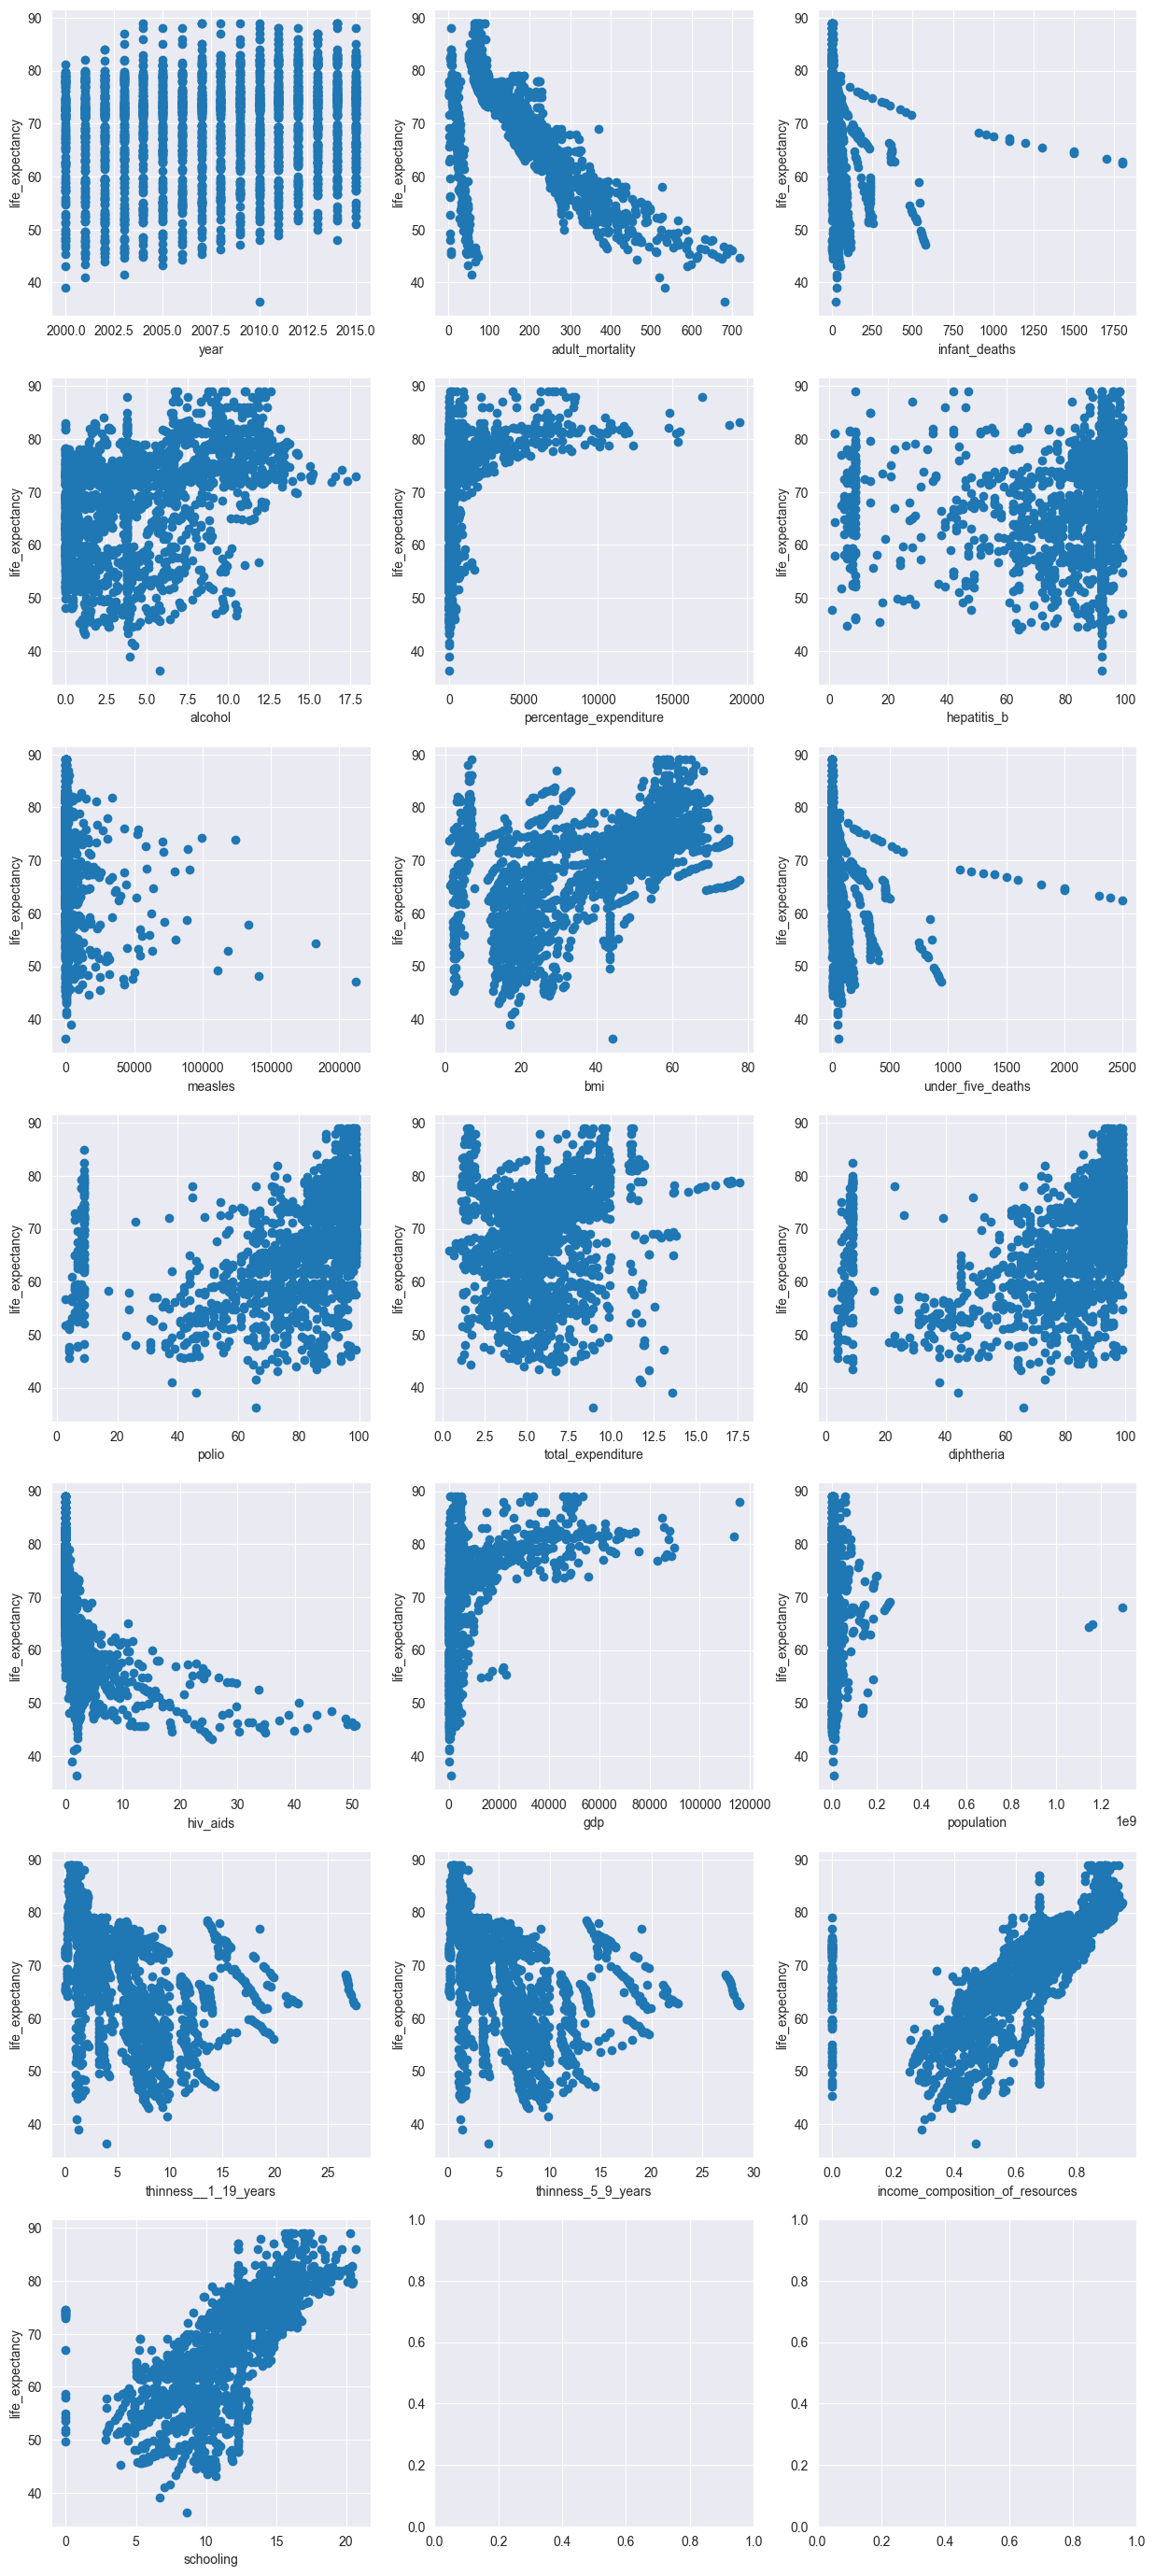

In [69]:
corr.visualise_numerical_correlation(train_df)

year Shapiro-Wilk Test: Statistic = 0.946502825892989, p-value = 2.2685952840604305e-28
The data does not follow a normal distribution.
adult_mortality Shapiro-Wilk Test: Statistic = 0.9175258206240801, p-value = 5.8287143269317205e-34
The data does not follow a normal distribution.
infant_deaths Shapiro-Wilk Test: Statistic = 0.2426731989606956, p-value = 6.6591697500742346e-71
The data does not follow a normal distribution.
alcohol Shapiro-Wilk Test: Statistic = 0.9172798666128136, p-value = 5.312323671958667e-34
The data does not follow a normal distribution.
percentage_expenditure Shapiro-Wilk Test: Statistic = 0.4113444855449898, p-value = 5.273190189288923e-66
The data does not follow a normal distribution.
hepatitis_b Shapiro-Wilk Test: Statistic = 0.6459660009408286, p-value = 1.148339085947472e-56
The data does not follow a normal distribution.
measles Shapiro-Wilk Test: Statistic = 0.20944006939852478, p-value = 9.342879409476411e-72
The data does not follow a normal distribu

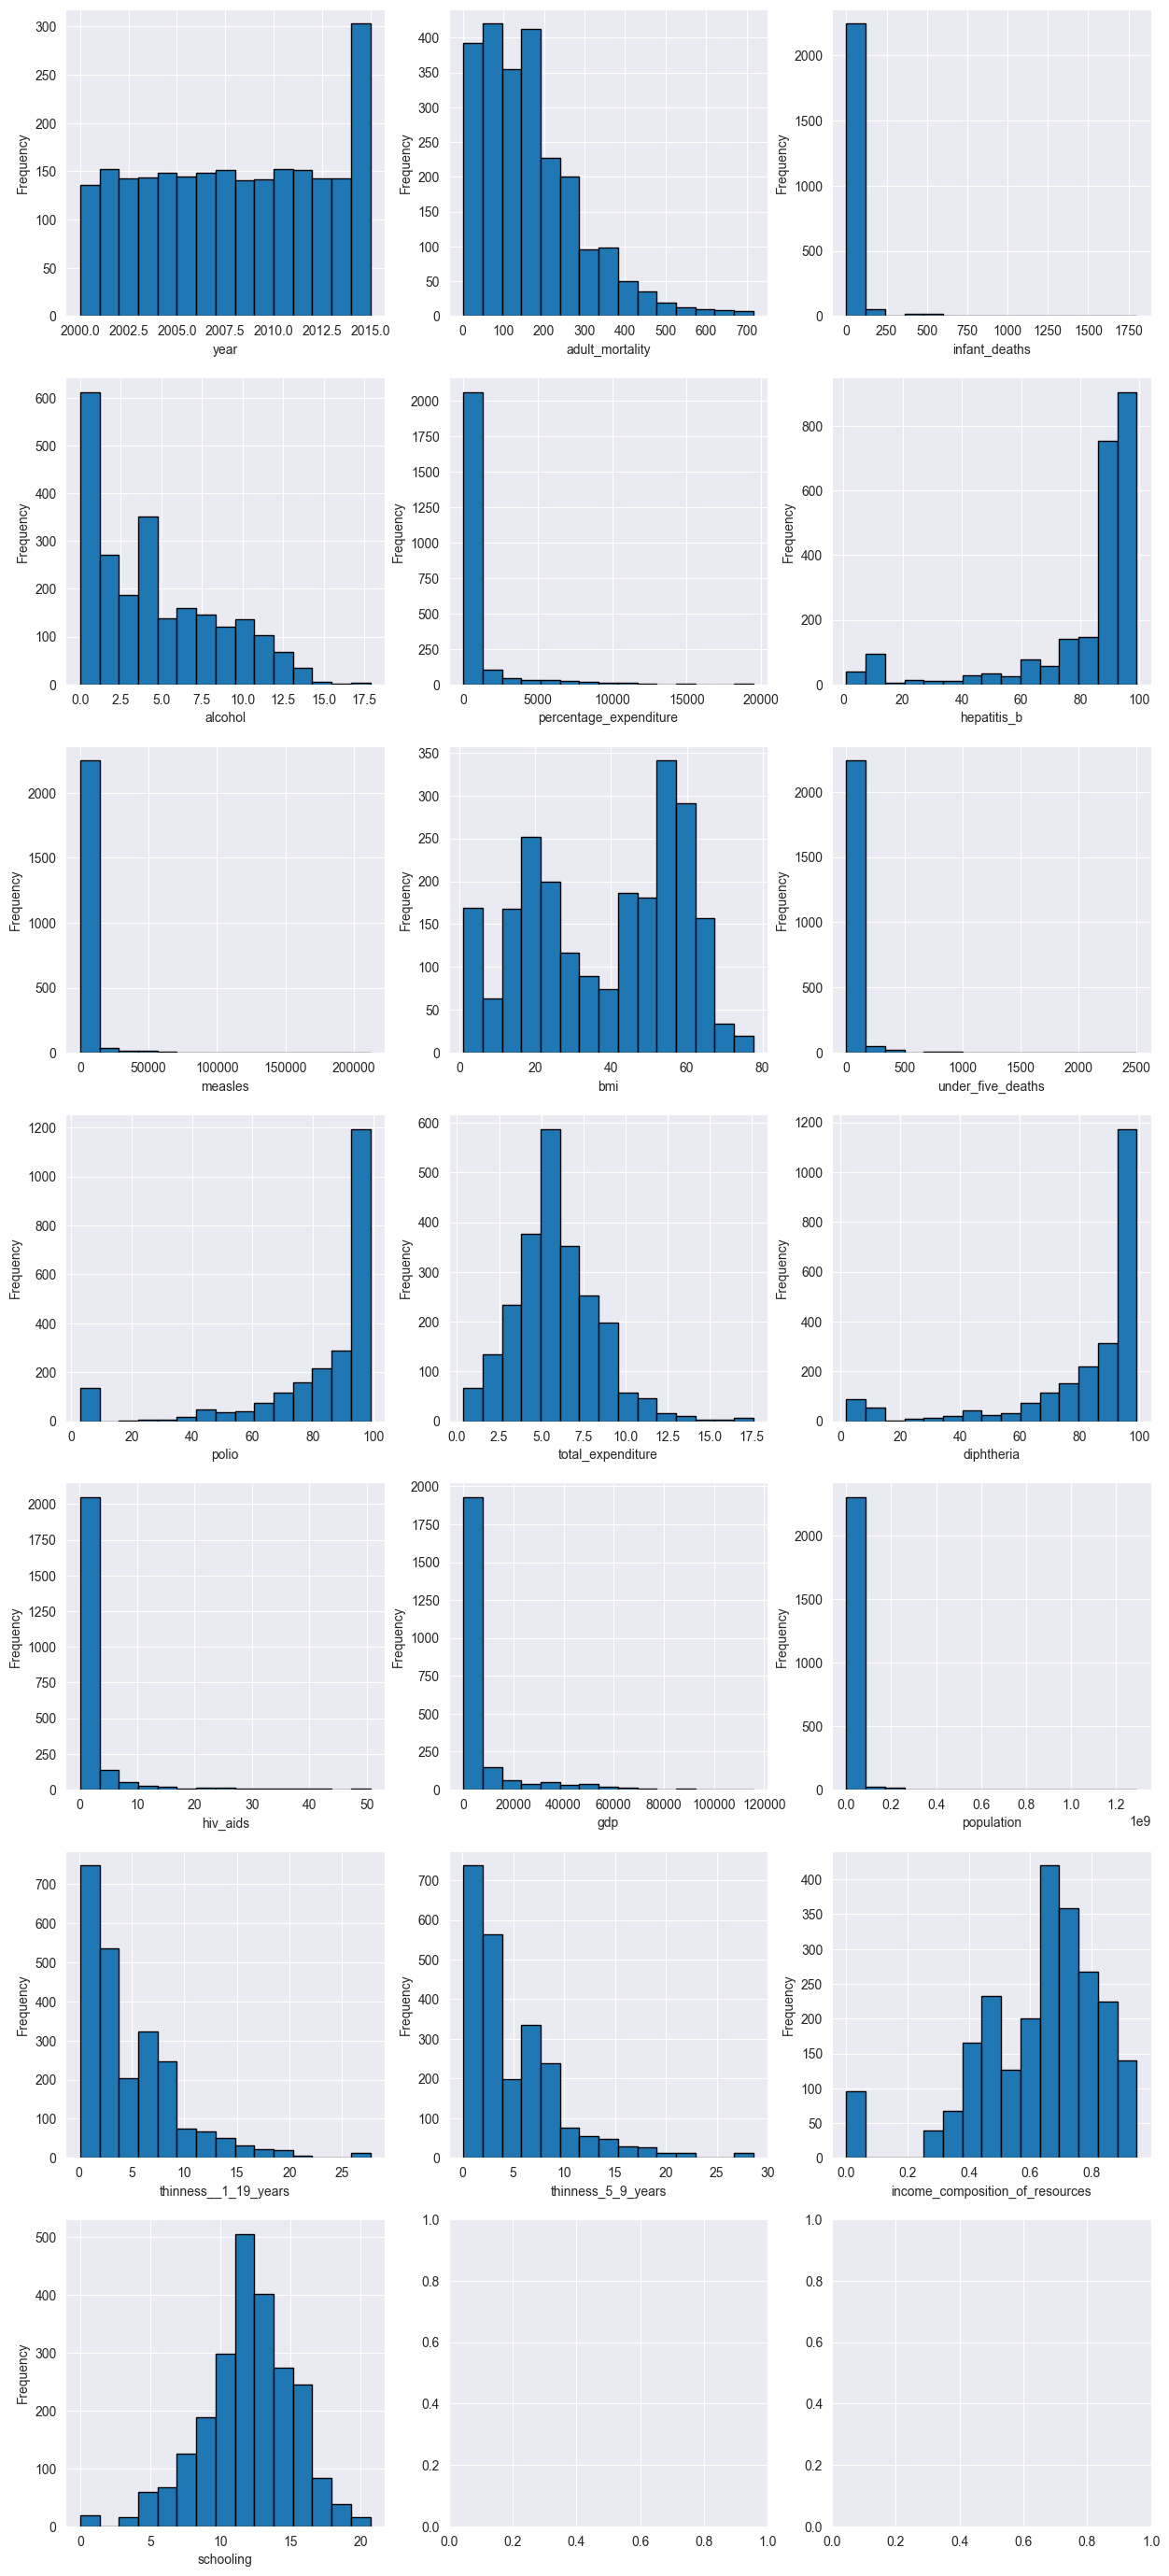

In [70]:
column_normality = corr.determine_normality(train_df)

In [71]:
corr.calculate_correlation_coefficients(train_df, column_normality)

year - Correlation Coefficient = 0.1615704074010675, p-value = 3.643029762281308e-15
adult_mortality - Correlation Coefficient = -0.6511502030156747, p-value = 1.260867669272151e-282
infant_deaths - Correlation Coefficient = -0.6070970372752614, p-value = 6.558028994589766e-236
alcohol - Correlation Coefficient = 0.42186683605306824, p-value = 1.0205233851853836e-101
percentage_expenditure - Correlation Coefficient = 0.4309640034558865, p-value = 1.5174735506037706e-106
hepatitis_b - Correlation Coefficient = 0.3009439491708919, p-value = 3.1516767446703777e-50
measles - Correlation Coefficient = -0.2997310987837136, p-value = 8.075417857316591e-50
bmi - Correlation Coefficient = 0.5835405337972431, p-value = 8.26239094755594e-214
under_five_deaths - Correlation Coefficient = -0.6254779122702502, p-value = 1.7267926174072774e-254
polio - Correlation Coefficient = 0.536967054829094, p-value = 4.470223060785689e-175
total_expenditure - Correlation Coefficient = 0.2739363261231429, p-valu

# Remove Outliers

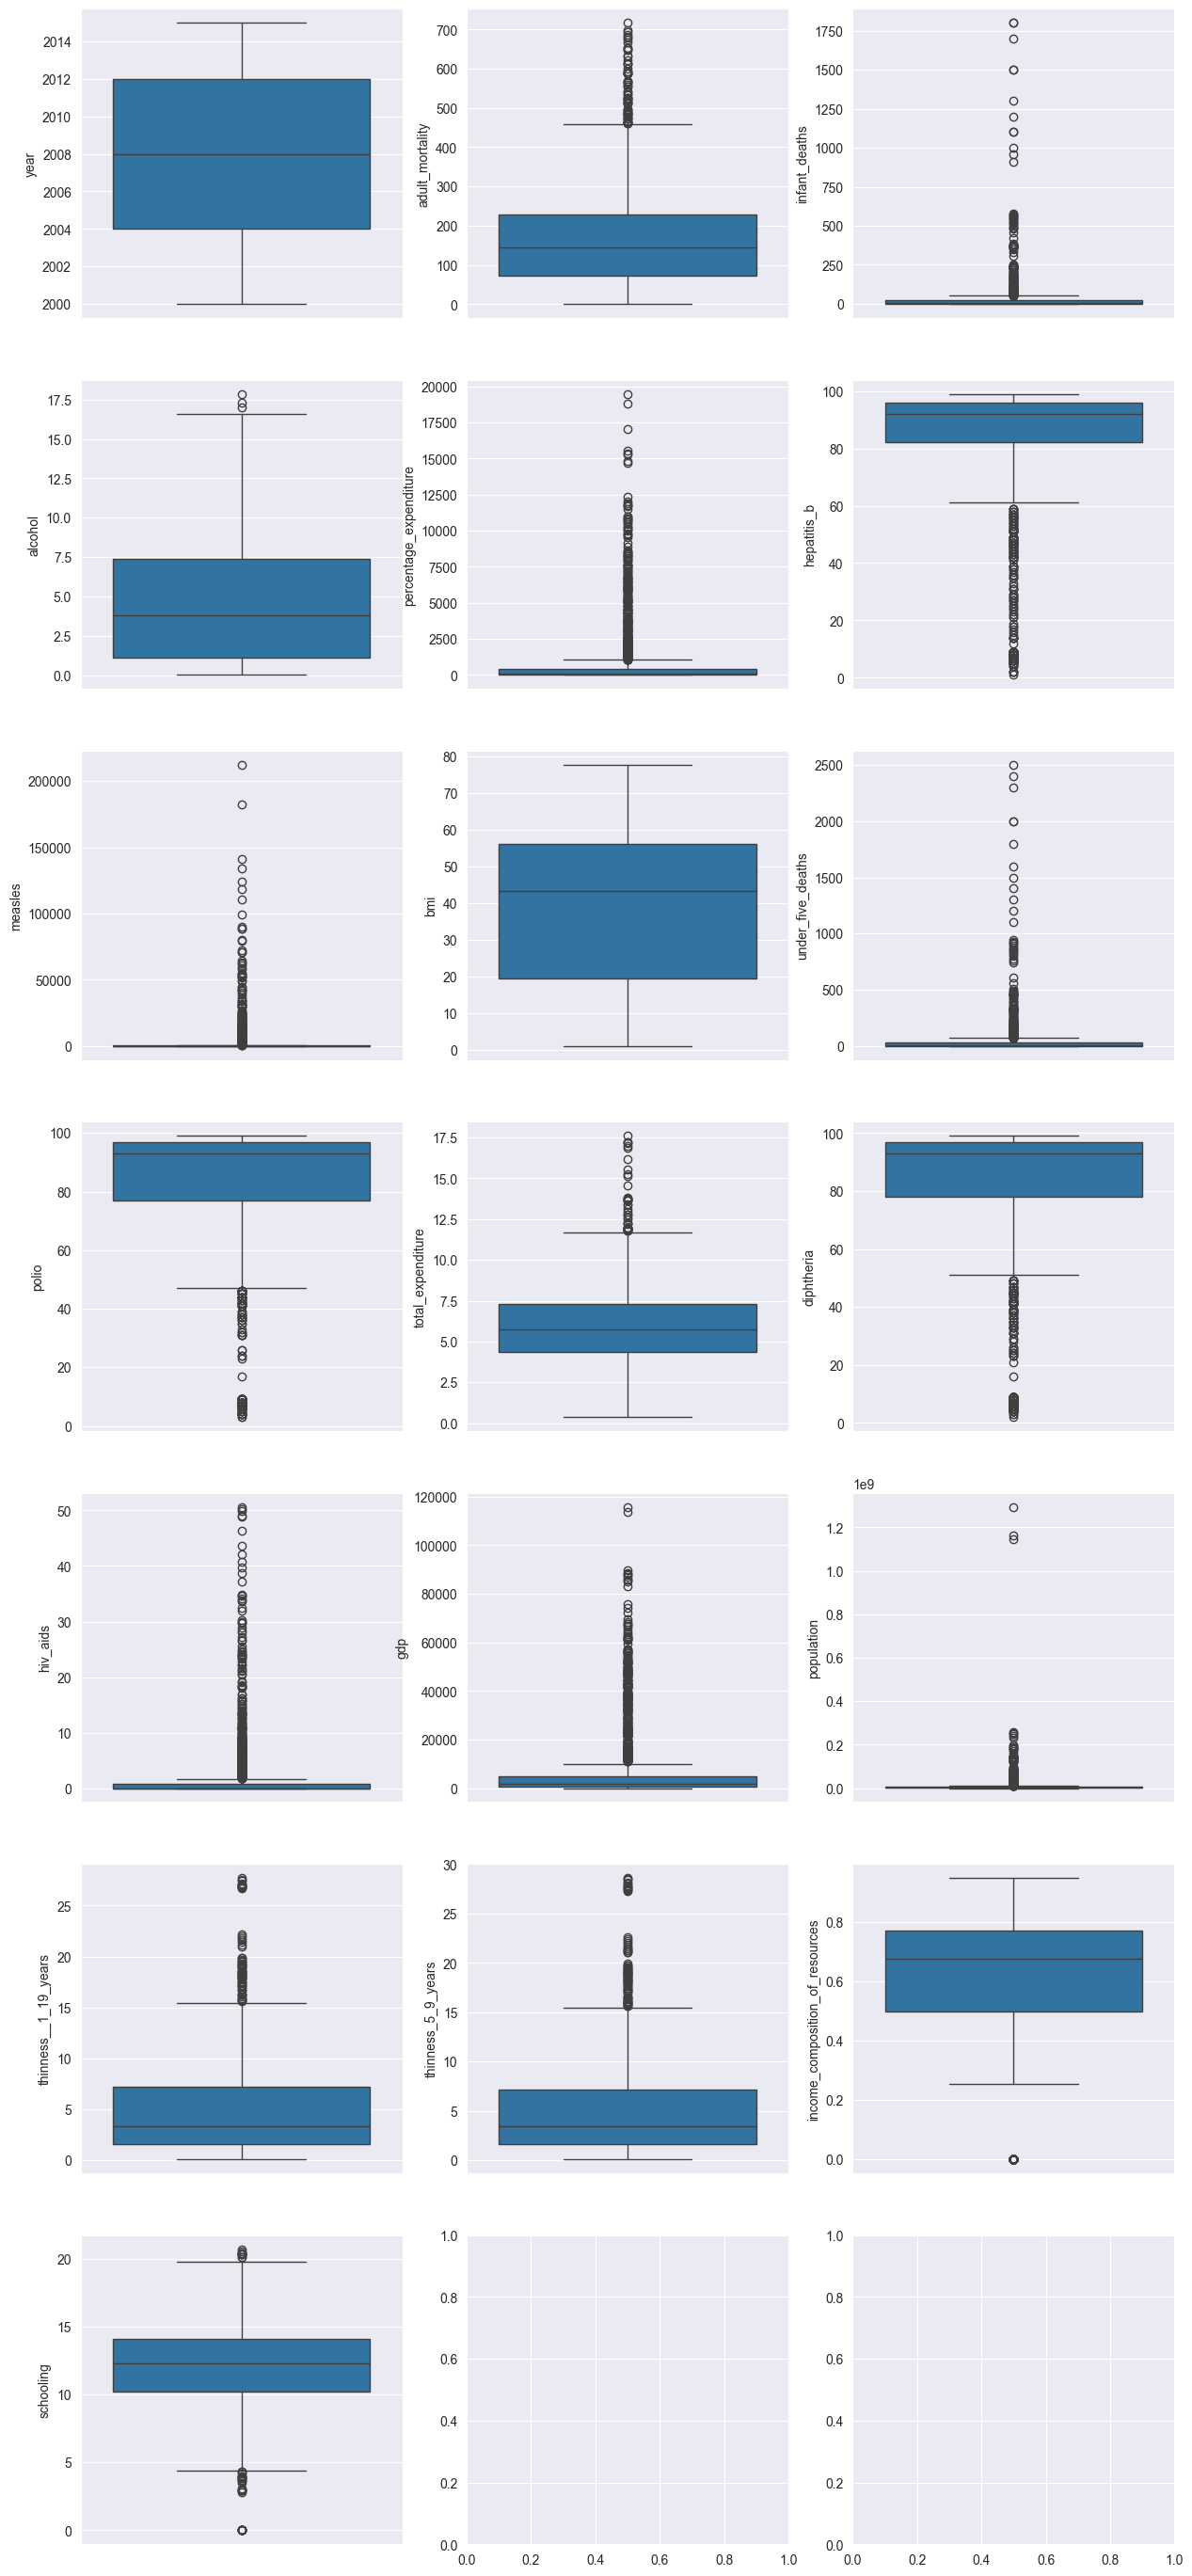

In [72]:
axes = grid_plots(numerical_columns)
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=X_train[numerical_columns[i]], ax=axes[i])

In [73]:
def remove_outliers(df, col, thresh):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - thresh * IQR
    upper_bound = Q3 + thresh * IQR
    num_outliers = df[((df[col]) < lower_bound) | (df[col] > upper_bound)].shape[0]
    if num_outliers > 0:
        print(f'{col} outliers detected, {num_outliers} outliers found.')
        df = df[df[col].between(lower_bound, upper_bound)]
    return df

In [74]:
for col in numerical_columns:
    X_train = remove_outliers(train_df, col, 20)

infant_deaths outliers detected, 27 outliers found.
percentage_expenditure outliers detected, 33 outliers found.
measles outliers detected, 144 outliers found.
under_five_deaths outliers detected, 26 outliers found.
hiv_aids outliers detected, 66 outliers found.
gdp outliers detected, 6 outliers found.
population outliers detected, 38 outliers found.


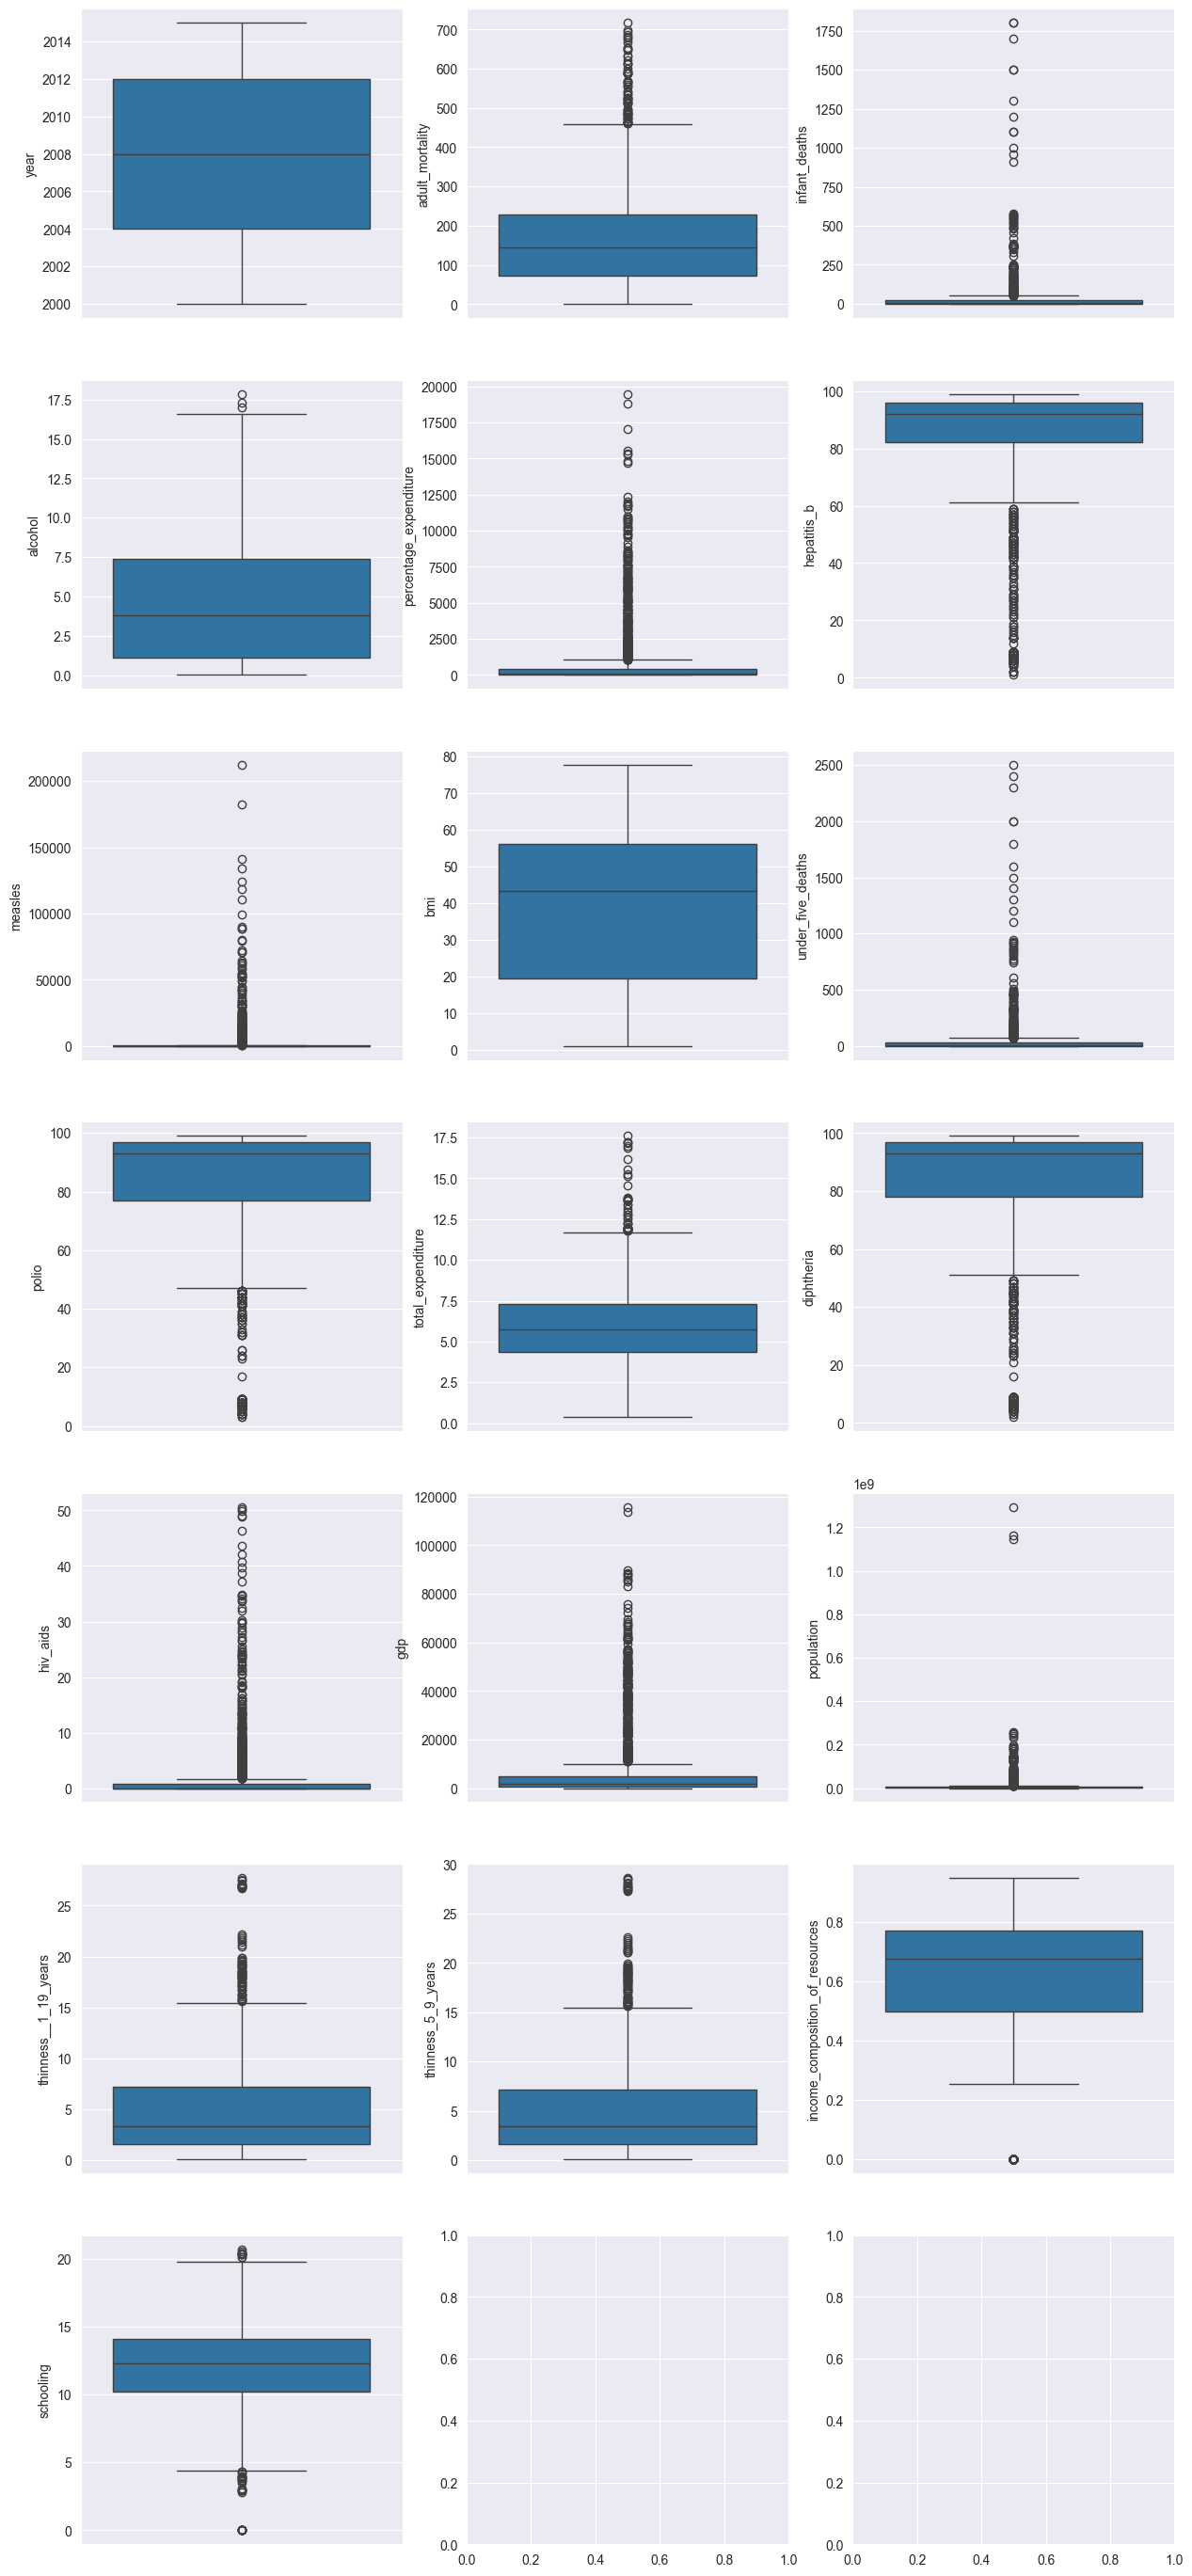

In [75]:
axes = grid_plots(numerical_columns)
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=X_train[numerical_columns[i]], ax=axes[i])

# Check for Linearity

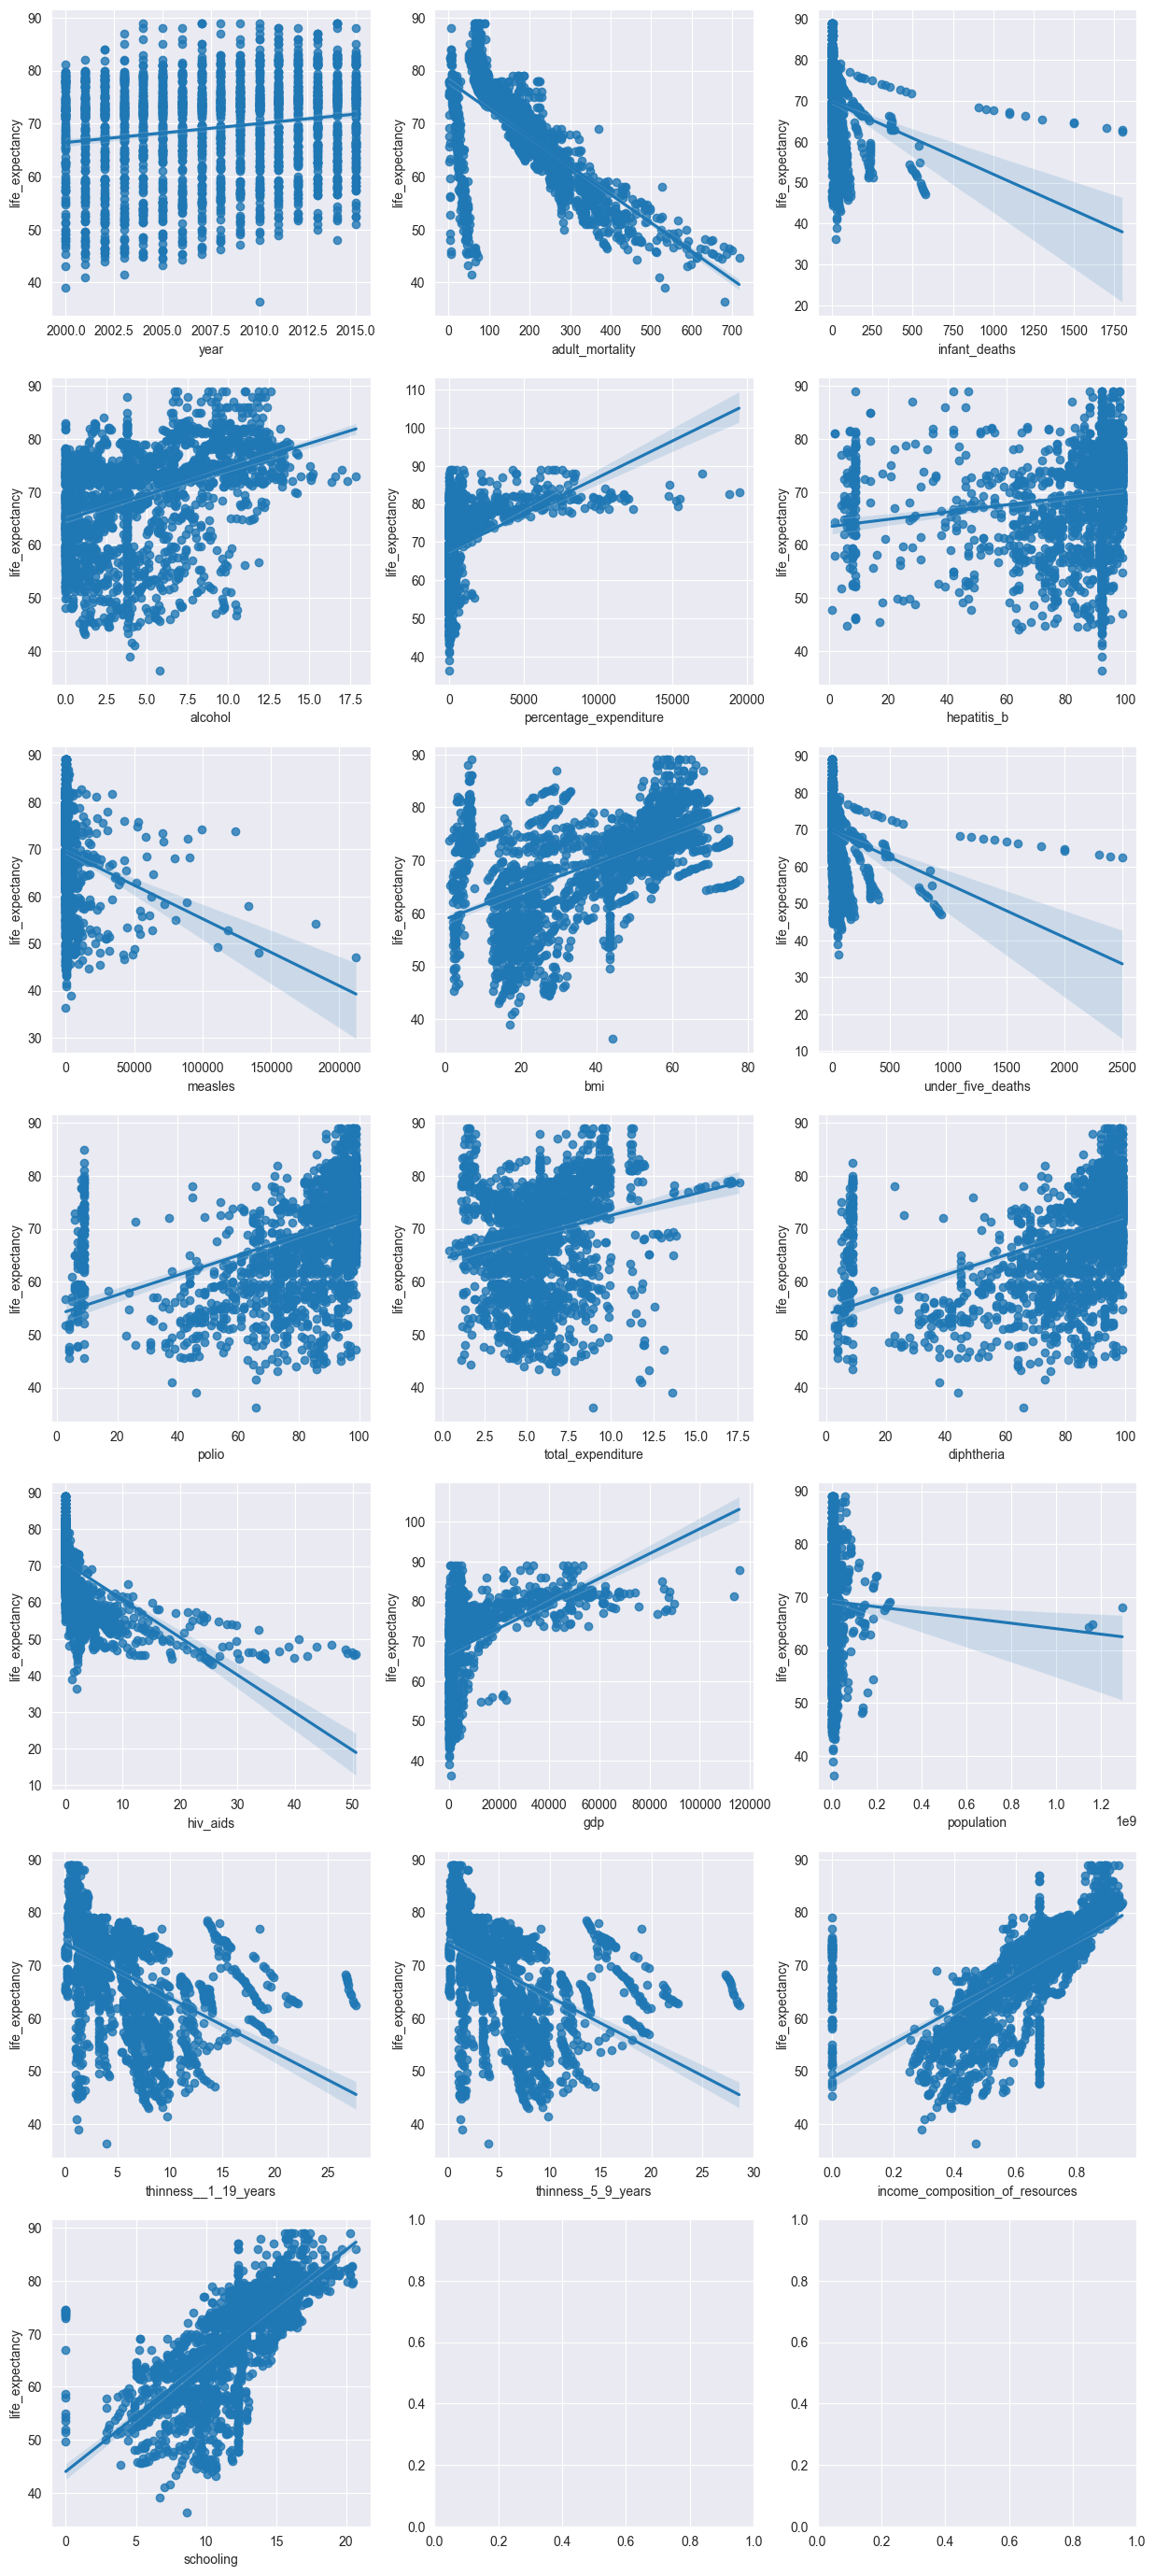

In [78]:
axes = grid_plots(numerical_columns)
for i, col in enumerate(numerical_columns):
    sns.regplot(x=col, y=target_column, data=X_train, ax=axes[i])

In [84]:
correlation_matrix = pd.concat([X_train[numerical_columns], y_train], axis=1).corr()
print(correlation_matrix[target_column].sort_values(ascending=False))

life_expectancy                    1.000000
schooling                          0.710993
income_composition_of_resources    0.684519
bmi                                0.561009
diphtheria                         0.469399
polio                              0.454772
gdp                                0.431437
alcohol                            0.390720
percentage_expenditure             0.387111
total_expenditure                  0.206949
year                               0.172242
hepatitis_b                        0.164920
population                        -0.026146
measles                           -0.169950
infant_deaths                     -0.209330
under_five_deaths                 -0.235214
thinness_5_9_years                -0.468779
thinness__1_19_years              -0.474983
hiv_aids                          -0.557158
adult_mortality                   -0.695271
Name: life_expectancy, dtype: float64


# Scale Numerical Features

In [79]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standardizing numerical data
        ('cat_nominal', OneHotEncoder(handle_unknown='ignore'), categorical_columns),  # One-hot encoding  # Ordinal encoding
    ]
)

In [80]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['year', 'adult_mortality', 'infant_deaths',
                                  'alcohol', 'percentage_expenditure',
                                  'hepatitis_b', 'measles', 'bmi',
                                  'under_five_deaths', 'polio',
                                  'total_expenditure', 'diphtheria', 'hiv_aids',
                                  'gdp', 'population', 'thinness__1_19_years',
                                  'thinness_5_9_years',
                                  'income_composition_of_resources',
                                  'schooling']),
                                ('cat_nominal',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['country', 'status'])])

In [81]:
X_train_scaled = preprocessor.transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [82]:
feature_names = (
    numerical_columns +
    list(preprocessor.named_transformers_['cat_nominal'].get_feature_names_out(categorical_columns))
)


In [83]:
X_train_scaled_df = pd.DataFrame(X_train_scaled.todense(), columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled.todense(), columns=feature_names)

# Check for Homoscedasticity

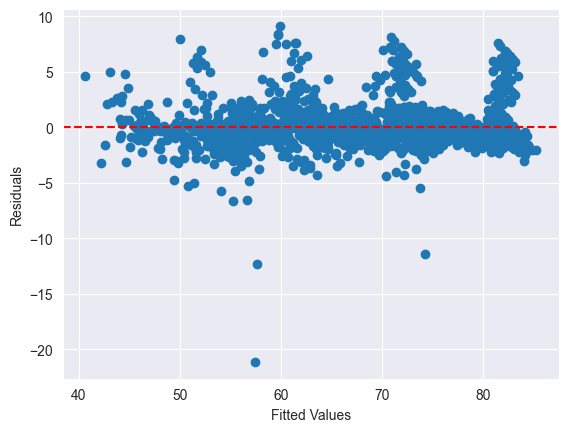

In [88]:
X = sm.add_constant(X_train_scaled_df)  # Add intercept
model = sm.OLS(y_train.reset_index()[target_column].values, X_train_scaled_df).fit()
residuals = model.resid

plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [89]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     294.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:27:39   Log-Likelihood:                -4686.1
No. Observations:                2342   AIC:                             9776.
Df Residuals:                    2140   BIC:                         1.094e+04
Df Model:                         201                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

# Check for Multicollinearity

In [92]:
 # Exclude target variable

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled_df[numerical_columns].columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df[numerical_columns].values, i) for i in range(X_train_scaled_df[numerical_columns].shape[1])]

print(vif_data)

                            Feature         VIF
0                              year    1.144115
1                   adult_mortality    1.685600
2                     infant_deaths  168.276712
3                           alcohol    1.648759
4            percentage_expenditure    5.342031
5                       hepatitis_b    1.312434
6                           measles    1.348902
7                               bmi    1.744879
8                 under_five_deaths  166.832039
9                             polio    1.904483
10                total_expenditure    1.195841
11                       diphtheria    2.130804
12                         hiv_aids    1.403188
13                              gdp    5.527036
14                       population    1.379466
15             thinness__1_19_years    8.033190
16               thinness_5_9_years    8.202119
17  income_composition_of_resources    3.019582
18                        schooling    3.358643


In [93]:
numerical_columns

['year',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness__1_19_years',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

In [98]:
vif_data = pd.DataFrame()
cols = [x for x in numerical_columns if x != 'under_five_deaths']
vif_data["Feature"] = X_train_scaled_df[cols].columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df[cols].values, i) for i in range(X_train_scaled_df[cols].shape[1])]

print(vif_data)

                            Feature       VIF
0                              year  1.142971
1                   adult_mortality  1.681392
2                     infant_deaths  2.019931
3                           alcohol  1.610929
4            percentage_expenditure  5.340522
5                       hepatitis_b  1.304333
6                           measles  1.340282
7                               bmi  1.744666
8                             polio  1.896042
9                 total_expenditure  1.195580
10                       diphtheria  2.091219
11                         hiv_aids  1.399600
12                              gdp  5.517468
13                       population  1.338758
14             thinness__1_19_years  8.015188
15               thinness_5_9_years  8.161513
16  income_composition_of_resources  2.996262
17                        schooling  3.351057


In [99]:
vif_data = pd.DataFrame()
cols = [x for x in numerical_columns if x not in ['under_five_deaths', 'thinness_5_9_years']]
vif_data["Feature"] = X_train_scaled_df[cols].columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df[cols].values, i) for i in range(X_train_scaled_df[cols].shape[1])]

print(vif_data)

                            Feature       VIF
0                              year  1.142956
1                   adult_mortality  1.680534
2                     infant_deaths  1.985962
3                           alcohol  1.608448
4            percentage_expenditure  5.340002
5                       hepatitis_b  1.304326
6                           measles  1.338255
7                               bmi  1.718034
8                             polio  1.895356
9                 total_expenditure  1.191409
10                       diphtheria  2.088948
11                         hiv_aids  1.398782
12                              gdp  5.514408
13                       population  1.338596
14             thinness__1_19_years  1.946106
15  income_composition_of_resources  2.995655
16                        schooling  3.351035


In [100]:
vif_data = pd.DataFrame()
cols = [x for x in numerical_columns if x not in ['under_five_deaths', 'thinness_5_9_years', 'percentage_expenditure']]
vif_data["Feature"] = X_train_scaled_df[cols].columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df[cols].values, i) for i in range(X_train_scaled_df[cols].shape[1])]

print(vif_data)

                            Feature       VIF
0                              year  1.130426
1                   adult_mortality  1.680438
2                     infant_deaths  1.985836
3                           alcohol  1.584716
4                       hepatitis_b  1.300696
5                           measles  1.338214
6                               bmi  1.711963
7                             polio  1.893320
8                 total_expenditure  1.159991
9                        diphtheria  2.088904
10                         hiv_aids  1.398061
11                              gdp  1.301769
12                       population  1.338405
13             thinness__1_19_years  1.945854
14  income_composition_of_resources  2.990777
15                        schooling  3.348839


In [113]:
exclude = ['under_five_deaths', 'thinness_5_9_years', 'percentage_expenditure']

# Train the model

In [117]:
model = LinearRegression()
final_cols = [x for x in X_train_scaled_df.columns if x not in exclude]
model.fit(X_train_scaled_df[final_cols], y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test_scaled_df[final_cols])

In [119]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3.84
R² Score: 0.96


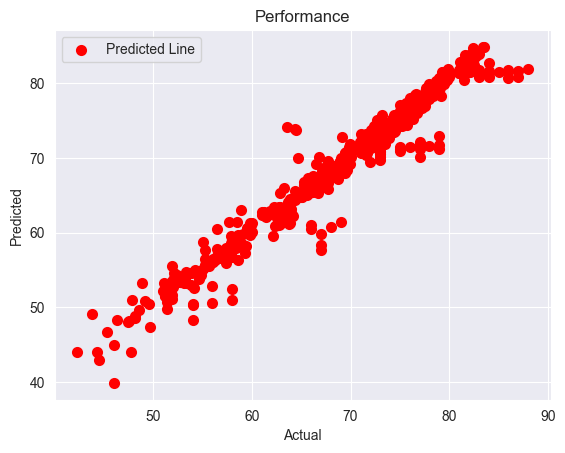

In [120]:

plt.scatter(y_test, y_pred, color='red', linewidth=2, label="Predicted Line")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Performance")
plt.legend()
plt.show()